In [29]:
import pandas as pd

In [30]:
data =pd.read_csv('result.csv')
data

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,popularity_level
0,0.84800,0.400,165360,0.205,0.000000,7,0.4000,-11.794,1.0,0.0270,79.545,0.357,0
1,0.56000,0.686,127027,0.844,0.000001,10,0.1200,-6.163,2.0,0.0484,109.039,0.897,0
2,0.57100,0.467,148533,0.277,0.001160,9,0.0762,-13.049,5.0,0.0302,86.895,0.597,0
3,0.78900,0.522,134520,0.673,0.000000,11,0.3180,-3.480,5.0,0.0425,141.010,0.659,0
4,0.60800,0.635,145013,0.829,0.000000,9,0.1860,-5.125,6.0,0.0471,139.426,0.963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,0.02640,0.611,132303,0.688,0.000000,1,0.2510,-5.688,94.0,0.3410,178.462,0.393,2
9512,0.69200,0.824,209438,0.588,0.000104,6,0.1490,-6.400,94.0,0.0924,98.027,0.513,2
9513,0.10400,0.896,196653,0.586,0.000000,10,0.7900,-6.687,95.0,0.0559,116.971,0.642,2
9514,0.32100,0.834,247059,0.454,0.000006,1,0.1140,-9.750,95.0,0.2010,81.618,0.837,2


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer

y = data['popularity_level']
X = data.drop(columns=['popularity', 'popularity_level'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

# smote
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the preprocessing steps
preprocessor = ColumnTransformer([
    ('minmax', MinMaxScaler(), [
        'tempo', 'duration_ms', 'loudness', 
        'energy', 'speechiness', 'danceability', 'liveness', 
        'instrumentalness', 'valence', 'acousticness'
    ]),
    ('categorical', OneHotEncoder(), ['key'])
], remainder='passthrough')

In [21]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline

# Create a pipeline for KNN
pipeline_knn = make_pipeline(preprocessor, KNeighborsClassifier(
    n_neighbors=2,
    #weights='distance',
    #metric = 'manhattan'
))

pipeline_knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = pipeline_knn.predict(X_test)

# 评估 KNN 模型
accuracy_knn = accuracy_score(y_test, y_pred_knn)
train_score_knn = pipeline_knn.score(X_train, y_train)
test_score_knn = pipeline_knn.score(X_test, y_test)
cr_knn = classification_report(y_test, y_pred_knn)

print(f"Model: KNeighborsClassifier")
print(f"Accuracy on Test Set for KNeighborsClassifier = {accuracy_knn:}")
print(f"Train Score for KNeighborsClassifier = {train_score_knn:}")
print(f"Test Score for KNeighborsClassifier = {test_score_knn:}\n")
print(cr_knn)


Model: KNeighborsClassifier
Accuracy on Test Set for KNeighborsClassifier = 0.42328709541824294
Train Score for KNeighborsClassifier = 0.6995936668067816
Test Score for KNeighborsClassifier = 0.42328709541824294

              precision    recall  f1-score   support

           0       0.46      0.69      0.55       844
           1       0.33      0.35      0.34       747
           2       0.49      0.20      0.29       788

    accuracy                           0.42      2379
   macro avg       0.43      0.42      0.39      2379
weighted avg       0.43      0.42      0.40      2379

KNeighborsClassifier: CrossVal Accuracy Mean: 0.40562443771337425


In [32]:
#SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline

# SVC Classifier with best parameters
pipeline_svc = make_pipeline(preprocessor, SVC(
    kernel='poly', C=0.1
))

pipeline_svc.fit(X_train, y_train)
y_pred_svc = pipeline_svc.predict(X_test)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
train_score_svc = pipeline_svc.score(X_train, y_train)
test_score_svc = pipeline_svc.score(X_test, y_test)
cr_svc = classification_report(y_test, y_pred_svc)

print(f"Model: SVC")
print(f"Accuracy on Test Set for SVC = {accuracy_svc}")
print(f"Train Score for SVC = {train_score_svc}")
print(f"Test Score for SVC = {test_score_svc}\n")
print(cr_svc)


Model: SVC
Accuracy on Test Set for SVC = 0.5203867171080285
Train Score for SVC = 0.51786464901219
Test Score for SVC = 0.5203867171080285

              precision    recall  f1-score   support

           0       0.54      0.75      0.63       844
           1       0.39      0.11      0.17       747
           2       0.52      0.66      0.59       788

    accuracy                           0.52      2379
   macro avg       0.49      0.51      0.46      2379
weighted avg       0.49      0.52      0.47      2379


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# randomforest
# print(X_train_preprocessed.shape)
# print(y_train.shape)
# print(X_test_preprocessed.shape)
# print(y_test.shape)

# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform the training and test data
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
print(f"X_train_preprocessed shape: {X_train_preprocessed.shape}")
print(f"X_test_preprocessed shape: {X_test_preprocessed.shape}")

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize and train the RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)

# use GridSearchCV to adjust parameters
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train_preprocessed, y_train)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test_preprocessed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
score1 = best_model.score(X_train_preprocessed, y_train)
score2 = best_model.score(X_test_preprocessed, y_test)

print(f"Model train score: {score1}")
print(f"Model test score: {score2}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, save the model for future use
# import joblib
# joblib.dump(model, 'random_forest_model.pkl')

# print("Model saved as 'random_forest_model.pkl'")

X_train_preprocessed shape: (7137, 22)
X_test_preprocessed shape: (2379, 22)
Fitting 3 folds for each of 216 candidates, totalling 648 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

KeyboardInterrupt: 

Inertia: 90170.41664400548
Silhouette Score: 0.16283748610201518


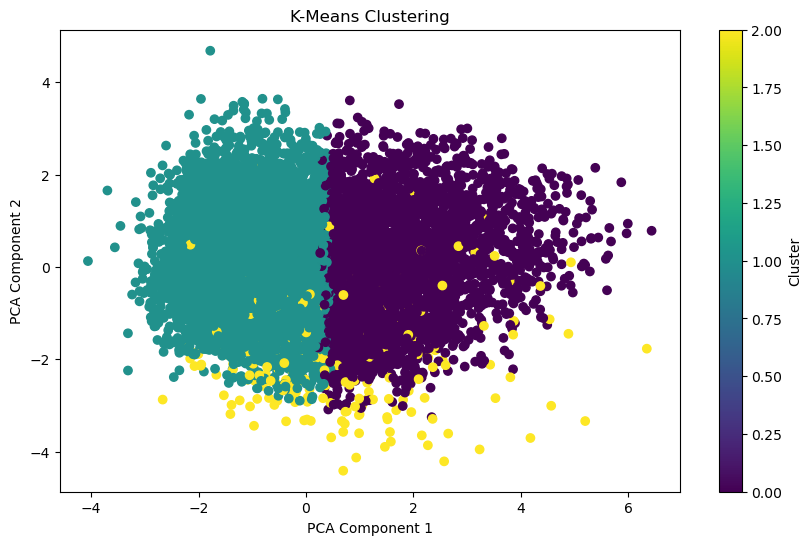

In [47]:
# kmean
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Standardize the features
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters (n_clusters) as needed
kmeans.fit(X_scaled)

# Predict the clusters
data['cluster'] = kmeans.predict(X_scaled)

# Visualize the clusters (optional, using PCA for 2D visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
data['pca1'] = principal_components[:, 0]
data['pca2'] = principal_components[:, 1]

# Calculate inertia
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, data['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Visual inspection
plt.figure(figsize=(10, 6))
plt.scatter(data['pca1'], data['pca2'], c=data['cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()
